In [2]:

import numpy as np
import matplotlib.pyplot as plt

# sympy = symbolic math in Python
import sympy as sym
import sympy.plotting.plot as symplot
from IPython.display import display

## Derivatives

In [3]:
x = sym.symbols('x')

fx = 2 * (x ** 2)

df = sym.diff(fx, x)

print(fx)
print(df)

2*x**2
4*x


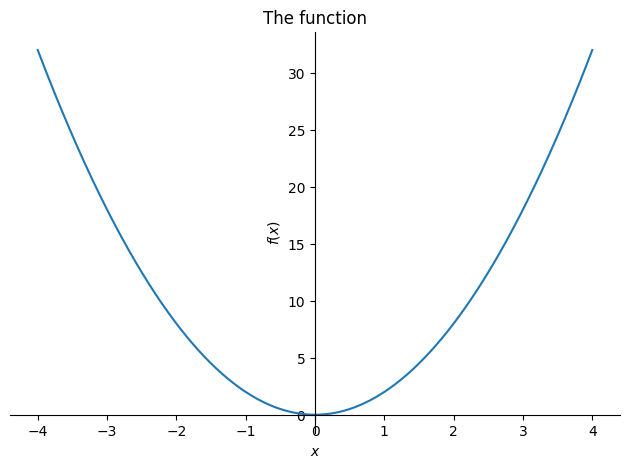

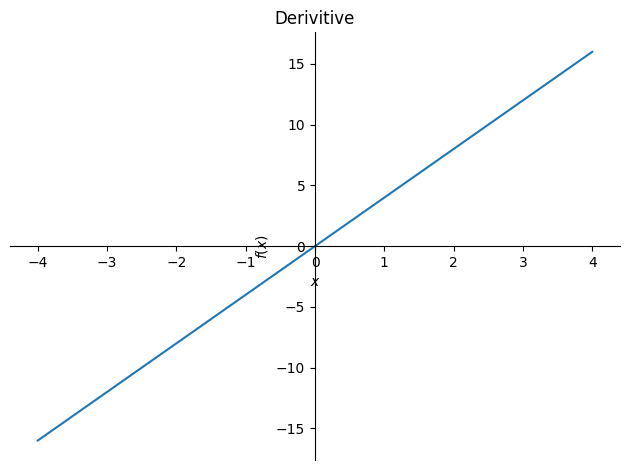

In [4]:
symplot(fx, (x, -4, 4), title = 'The function')
plt.show()

symplot(df, (x, -4, 4), title = 'Derivitive')

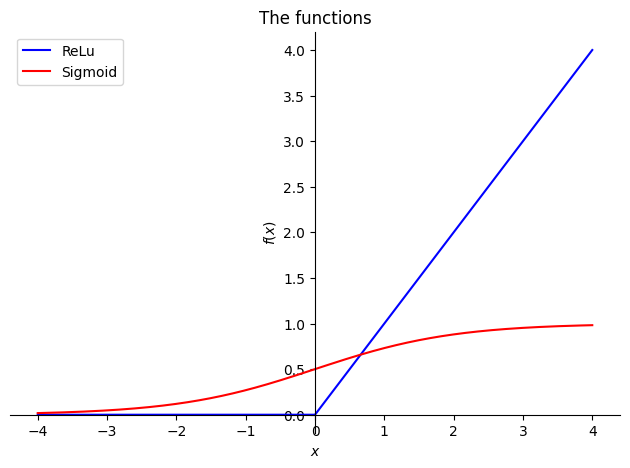

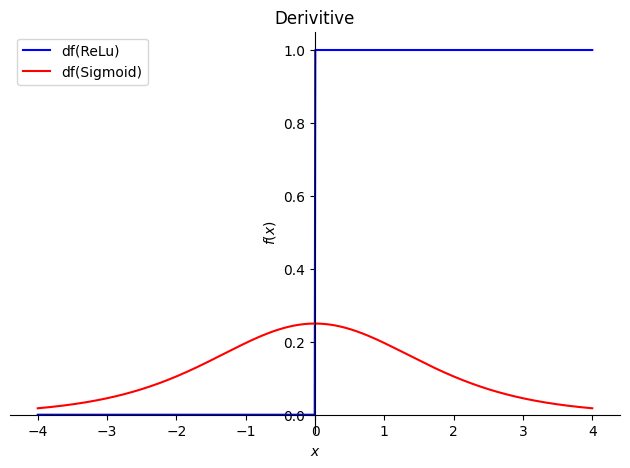

In [5]:
#-----------------
#-- ReLu & Sigmoid
#-----------------

relu = sym.Max(0, x)
sigmoid = 1 / (1 + sym.exp(-x))

p = symplot(relu, (x, -4, 4), label = 'ReLu', show = False, line_color = 'blue')
p.extend(symplot(sigmoid, (x, -4, 4), label = 'Sigmoid', show = False, line_color = 'red'))
p.legend = True
p.title = 'The functions'
p.show()

# Derivitive

p = symplot(sym.diff(relu), (x, -4, 4), label = 'df(ReLu)', show = False, line_color = 'blue')
p.extend(symplot(sym.diff(sigmoid), (x, -4, 4), label = 'df(Sigmoid)', show = False, line_color = 'red'))
p.legend = True
p.title = 'Derivitive'
p.show()

## Product and chain rules

In [6]:
x = sym.symbols('x')

fx = 2 * (x ** 2)
gx = 4 * (x ** 3) - 3 * (x ** 4)


df = sym.diff(fx)
dg = sym.diff(gx)

manual  = df*gx + fx*dg

viasympy = sym.diff(fx * gx)


print('The functions :')
display(fx)
display(gx)
print('')

print('Derivitive')
display(df)
display(dg)

print('Manual product rule')
display(manual)

print('Via sympy')
display(viasympy)

The functions :


2*x**2

-3*x**4 + 4*x**3


Derivitive


4*x

-12*x**3 + 12*x**2

Manual product rule


2*x**2*(-12*x**3 + 12*x**2) + 4*x*(-3*x**4 + 4*x**3)

Via sympy


2*x**2*(-12*x**3 + 12*x**2) + 4*x*(-3*x**4 + 4*x**3)

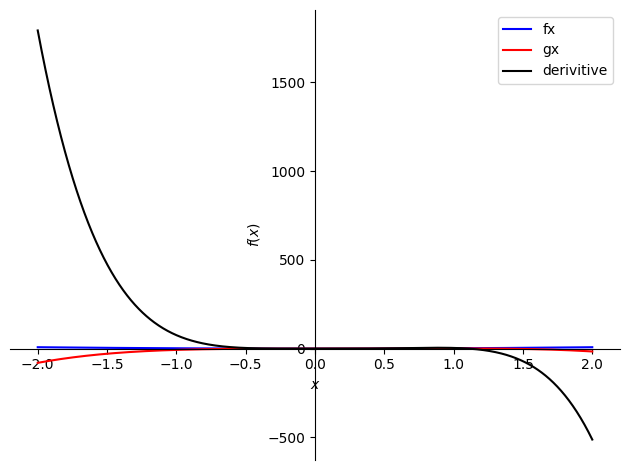

In [7]:
p = symplot(fx, (x, -2, 2), label = 'fx', show = False, line_color = 'blue')
p.extend(symplot(gx, (x, -2, 2), label = 'gx', show = False, line_color = 'red'))
p.extend(symplot(viasympy, (x, -2, 2), label = 'derivitive', show = False, line_color = 'black'))
p.legend = True
p.show()

In [8]:
gx = x**2 + 4 * x**3
fx = gx**5
print('The function:')
display(fx)

print('Derivitive')
display(sym.diff(fx))

The function:


(4*x**3 + x**2)**5

Derivitive


(60*x**2 + 10*x)*(4*x**3 + x**2)**4

## Derivitive and Integral By Hand

In [9]:
def f(x):
    return np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)

In [10]:
def derive(function, value):
    h = 0.000000000001
    top = function(value + h) - function(value)
    bottom = h
    slope = top / bottom
    return float('%.3f' % slope)

$$
f_X(x) = \frac{1}{\sqrt{2\pi}} \times e^{\frac{1}{2} x^2}
$$

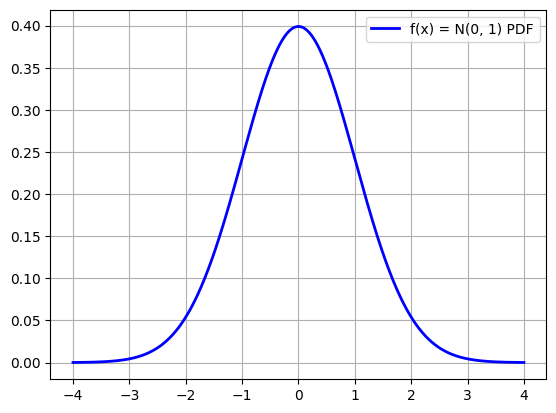

In [11]:
x = np.linspace(-4, 4, 1000)
y = f(x)
plt.plot(x, y, 'b', linewidth = 2, label = 'f(x) = N(0, 1) PDF')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
def integrate(function, lower, upper):
    chunk = 0.01
    series = np.arange(lower, upper + chunk, chunk)
    res = []
    for i in range(0, len(series) - 1):
        j = f(series[i + 1]) * chunk
        res.append(j)
    
    return np.sum(res)


$$
F_X(x) = \int_{-\infty}^{x}{f_X(y) dy}
$$

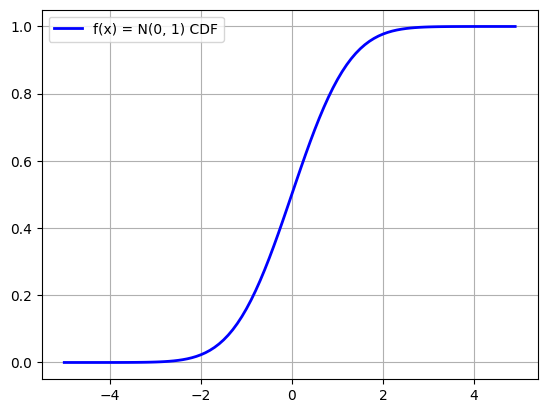

In [13]:
lower = -10
upper = np.arange(-5, 5, 0.1)
chunk = 0.000000001
Fx = [integrate(f, lower, i) for i in upper]


plt.plot(upper, Fx, 'b', linewidth = 2, label = 'f(x) = N(0, 1) CDF')
plt.legend()
plt.grid(True)
plt.show()